# Part I - Prosper loan data Investigation
## By Babawale kehinde

## Introduction
> The data to be investigataed is sourced from proper loan data hosted on udacity workspace, Prosper is a peer-to-peer marketplace of lending platform in US. About 0.9 million people have gotten loan from it and the loan amount has been $14 billion. It matches investors and borrowers.

>The data consist of 81 columns(attributes) and 113937 rows (obersavtions). In this reserach i will be exploring mainly the relationship of the borrower's income Range, loan status, employment status, states e.t.c..


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
#read th source data 

loan_df = pd.read_csv("C:\\Users\\k2k\\Desktop\\udacity alx projects\\project 3\\prosperLoanData.csv")
loan_df.shape

(113937, 81)

### What is the structure of your dataset?

> The loan data has 113937 rows and 81 columns




In [3]:
#check the features of the data
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [4]:
loan_df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


### What is/are the main feature(s) of interest in your dataset?

> Main Features of Dataset include, loan term, loan status,creditGrade, borrower state, employment status, income range, loan original amount and occupation.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> In these research i will focus on the factor that affect term of loan by exploring the relationship between the term of loan and other features like loan status,creditGrade, borrower state, employment status, income range, loan original amount and occupation.

## Univariate Exploration



In [5]:
# make copy  of only the important featurs of the dataset

df = loan_df.copy()
df.head()




,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


### what is the distribution of Term,LoanStatus,EmploymentStatus and IncomeRange?

In [7]:
cols = ['Term','LoanStatus','EmploymentStatus','IncomeRange']
##adding generator 
def plotgenerator():
    ##plot distribution of 'Term','LoanStatus','EmploymentStatus','IncomeRange' using for loop function
    for i in cols:
        fig, ax = plt.subplots(1,1, figsize=(11, 8))
        sb.countplot(x = df[i][1:],data=df.iloc[1:], order=df[i][1:].value_counts().index, palette='Greens_r')
        fig.text(0.1, 0.95, f'Distribution of {i}', fontsize=16, fontweight='bold', fontfamily='serif')
        plt.xticks(rotation=70)
        plt.xlabel(f'{i}', fontsize=12, fontweight='bold', fontfamily='serif')
        plt.ylabel('Count', fontsize=12, fontweight='bold', fontfamily='serif')
        #log scaling
        
        yield

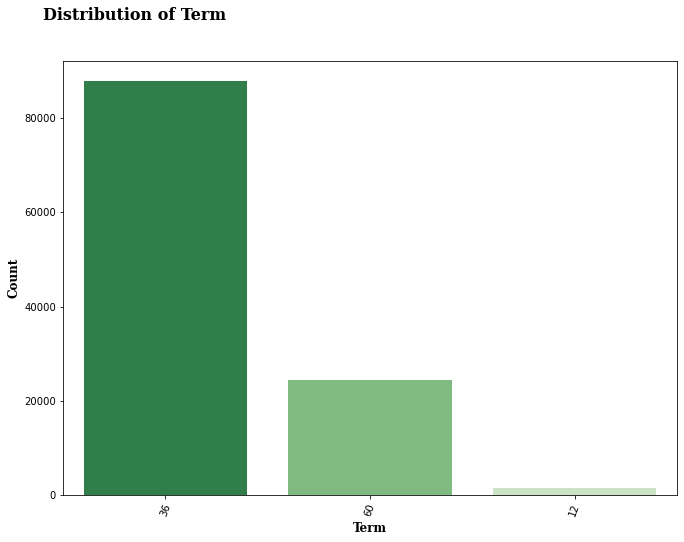

In [8]:
countplot= plotgenerator()
next(countplot)

### Observation;

In Univariate exploration most of term loan is 36 month followed by 60 Month and then 12 month.

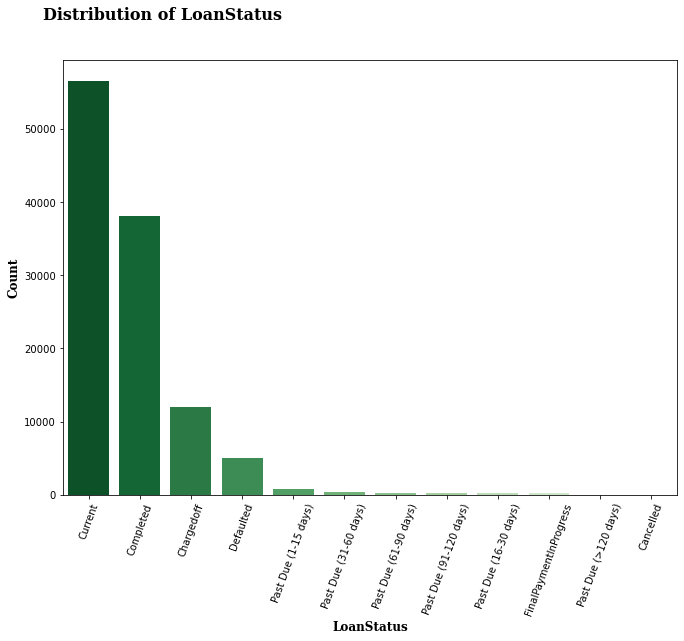

In [9]:
next(countplot)

### Observation;

The Loan status has much categories, it can be categories to fewer status. 50% of the loan are current loan, 33% are completed, 11% are defaulted while others are past due, cancelled and Final Payment In Progress.

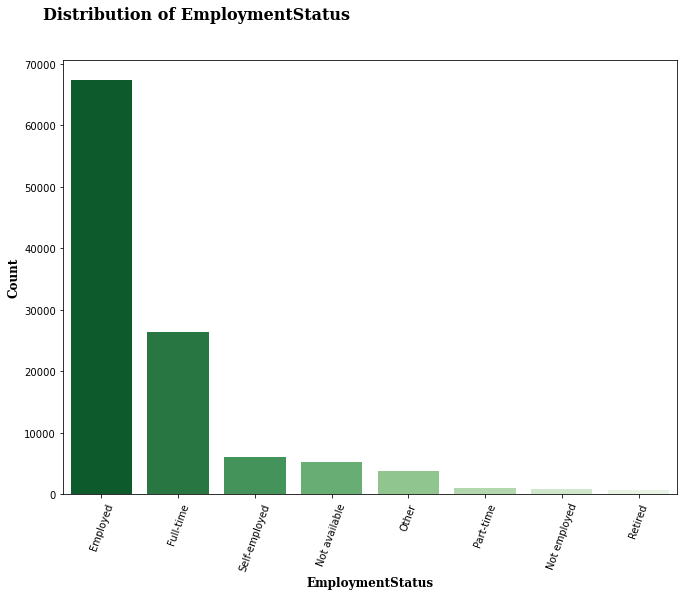

In [10]:
next(countplot)

In [11]:
print(df.EmploymentStatus.value_counts())
df.EmploymentStatus.value_counts(normalize = True)

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64


Employed         0.602801
Full-time        0.235983
Self-employed    0.054924
Not available    0.047877
Other            0.034079
Part-time        0.009742
Not employed     0.007477
Retired          0.007118
Name: EmploymentStatus, dtype: float64

### Observation;

10,000 (90%) of borrwer are employed, 3806 (5%) of borrower are others, 5347(4%) not avialable. less than 2% borrower are in not emplyed and retired range.

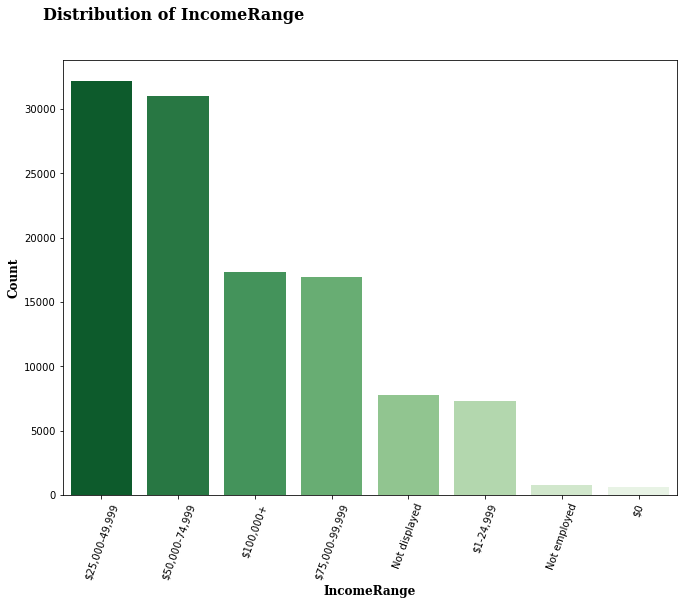

In [12]:
next(countplot)

### Observation

$25,000-49,999 income range is the most common among the borrower, followed by 50,000-74,9999. Not-employement, 1-24,999, 0, not displayed are less than 1%.

In Univariate exploration most of term loan is 36 month followed by 60 Month and then 12 month. $25,000-49,999 income range is the most common among the borrower. 90% of the borrower are employed while less than 1% are both retired and not employed others are not specified. The distribution of the loan amount decrease as the loan amount increased. i also observered that the loan status can also be recategorised to current, completed, charged off, pass due and cancled.

### What is the distribution of borrowers occupation?

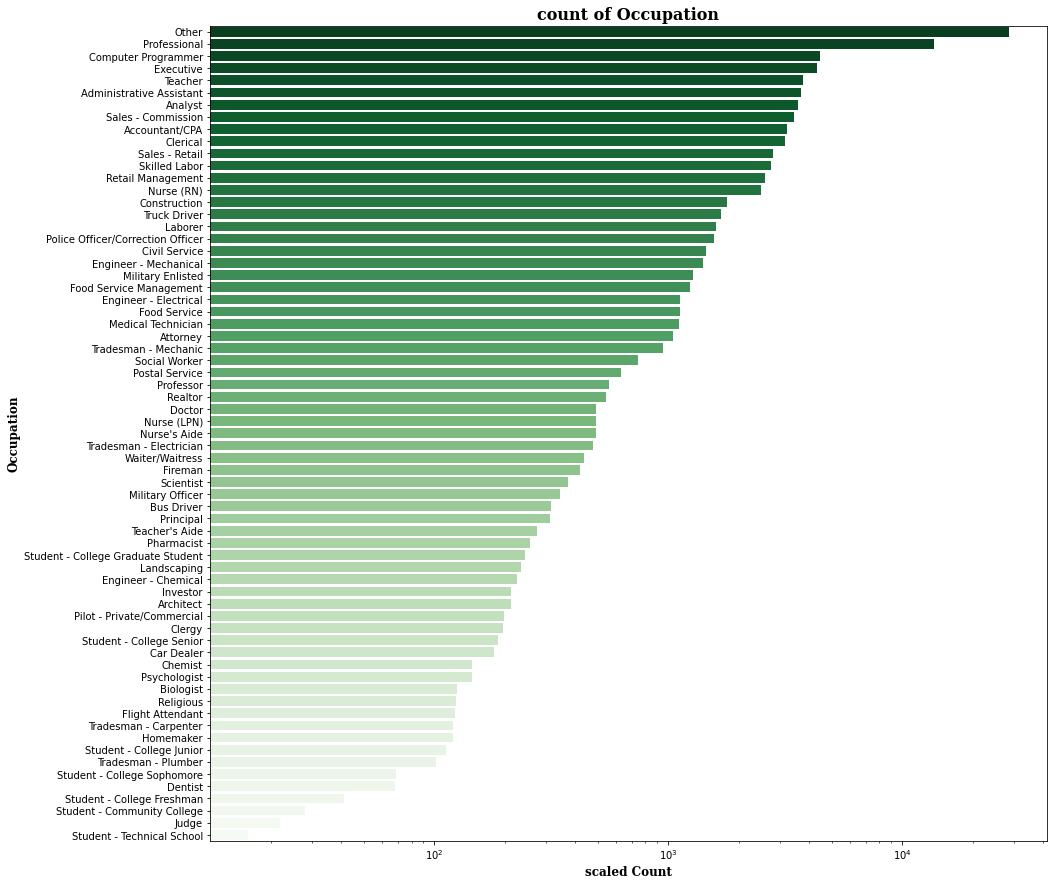

In [13]:
#to sort the graph
order = df['Occupation'].value_counts().index

plt.subplots(1,1, figsize=(15, 15))
sb.countplot(data=df, y='Occupation',palette='Greens_r', order = order)
#log scaling
plt.xscale('log')
plt.title('count of Occupation', fontsize=16, fontweight='bold', fontfamily='serif')
plt.ylabel('Occupation', fontsize=12, fontweight='bold', fontfamily='serif')
plt.xlabel('scaled Count', fontsize=12, fontweight='bold', fontfamily='serif');

In [14]:
df['Occupation'].value_counts(normalize = True)

Other                          0.259332
Professional                   0.123499
Computer Programmer            0.040580
Executive                      0.039067
Teacher                        0.034065
                                 ...   
Dentist                        0.000616
Student - College Freshman     0.000372
Student - Community College    0.000254
Judge                          0.000199
Student - Technical School     0.000145
Name: Occupation, Length: 67, dtype: float64

26% of the borrower occupation are classified as others, 12% are professional, 4% are computer Programmer, 3% are execeutives.

### What is the Borrwer loan Amount distribution?

count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: LoanOriginalAmount, dtype: float64


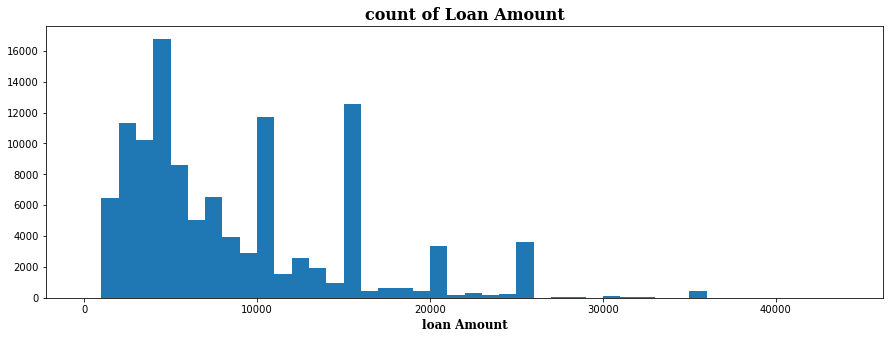

In [15]:
print(df['LoanOriginalAmount'].describe())

#ploting hist to show loan amount distribution
# Get the ticks for bins between [0 - maximum weight]
bins = np.arange(0, df['LoanOriginalAmount'].max()+10000, 1000)
fig, ax = plt.subplots(1,1, figsize=(15, 5))
plt.hist(data=df, x='LoanOriginalAmount', bins=bins)
plt.title('count of Loan Amount', fontsize=16, fontweight='bold', fontfamily='serif')
plt.xlabel('loan Amount', fontsize=12, fontweight='bold', fontfamily='serif');

using the statics discription and the histogram, there is possiblity of  an outlier in the loan original amount of 35,000 compare to the mean, 3rd quartile and standard deviation.

The Distribution of Loan ternm shows that 77% of loan term is 36 month while 21% is 60 months others 12 months. 
26% of the occupation are not specified, professional has 12% as the highest occupation distribution. 40% of the loan are current, 33% are completed as the time it was listed, 11% are charge off and others are either defaulted or past due though some few are cancelled or yet to be completed. 60% of loan borrower are employed.

In employmentStatus, some of the data are not well captured, i consider full_time, self_employed, part time as employed, so i will change the input to employed so that the categories will be employed, not employed , others not avialable and retired.


#### Data wrangling

In [16]:
## little wrangling
#replacing "Full-time", "Self-employed", 'Part-time' with "Employed".

df = df.replace(to_replace=["Full-time", "Self-employed", 'Part-time'],
           value="Employed")
df['EmploymentStatus'].value_counts()

## categorising Loan status to a fewer categories

df['loan_status'] = np.where( df['LoanStatus'].str.contains('Past Due'), 'Past Due', df['LoanStatus'])

df.loan_status.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due                   2067
FinalPaymentInProgress      205
Cancelled                     5
Name: loan_status, dtype: int64

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### What is the distribution of Term, loan status, Employement Status and income Range by Loan Amount?

In [17]:
cols = ['Term','loan_status','EmploymentStatus','IncomeRange']
income_order = ['$100,000+','$75,000-99,999','$50,000-74,999','$25,000-49,999','$1-24,999','$0','Not employed']


### making Generator function
def generator():
    ##using for loop for the columns in cols
    for i, order in zip(cols, income_order):
          ##plotting volin chart
          fig, ax = plt.subplots(1,1, figsize=(11, 8))
          ### plot volin chart using seaborn library
          sb.violinplot(data=df, x=i, y='LoanOriginalAmount', color = sb.color_palette()[0], inner='quartile')
          ### set title and text
          fig.text(0.1, 0.95, f' loan Amount by {i}', fontsize=16, fontweight='bold', fontfamily='serif')
          ### label axis and tick rotation
          plt.xticks(rotation=70)
          plt.xlabel(f'{i}', fontsize=12, fontweight='bold', fontfamily='serif')
          plt.ylabel('loan Amount', fontsize=12, fontweight='bold', fontfamily='serif')

        ##plotting boxplot 
          fig, ax = plt.subplots(1,1, figsize=(11, 8))
          ### plot box plot chart using seaborn library
          sb.boxplot(data=df, x=i, y='LoanOriginalAmount', color = sb.color_palette()[1])
          ### set title and text
          fig.text(0.1, 0.95, f' loan Amount by {i}', fontsize=16, fontweight='bold', fontfamily='serif')
          ### label axis and tick rotation
          plt.xticks(rotation=70)
          plt.xlabel(f'{i}', fontsize=12, fontweight='bold', fontfamily='serif')
          plt.ylabel('loan Amount', fontsize=12, fontweight='bold', fontfamily='serif')

          yield

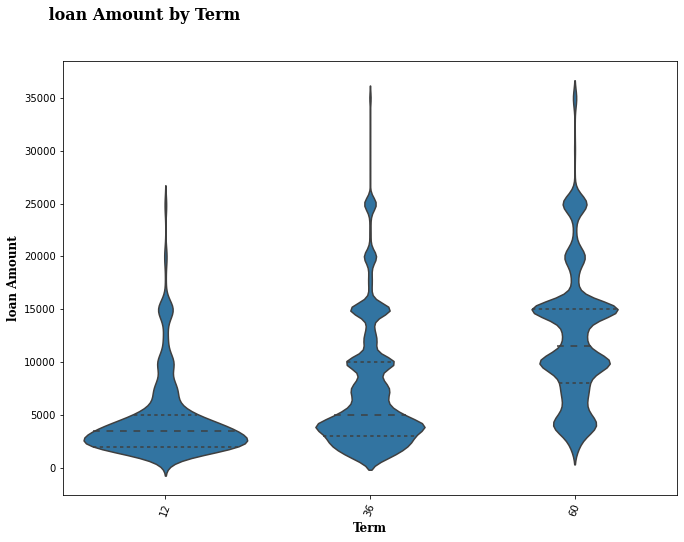

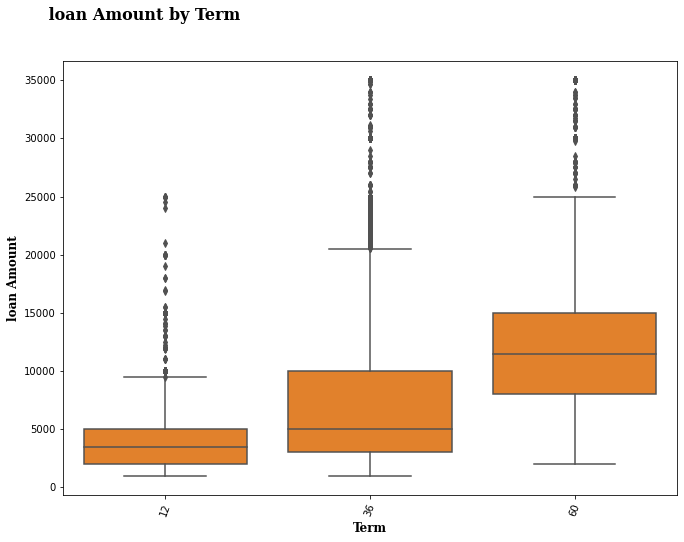

In [18]:
## initalising generator()
generator = generator()
next(generator)

#### Observation

The chart above shows that the Loan amount increases as the loan term increase.

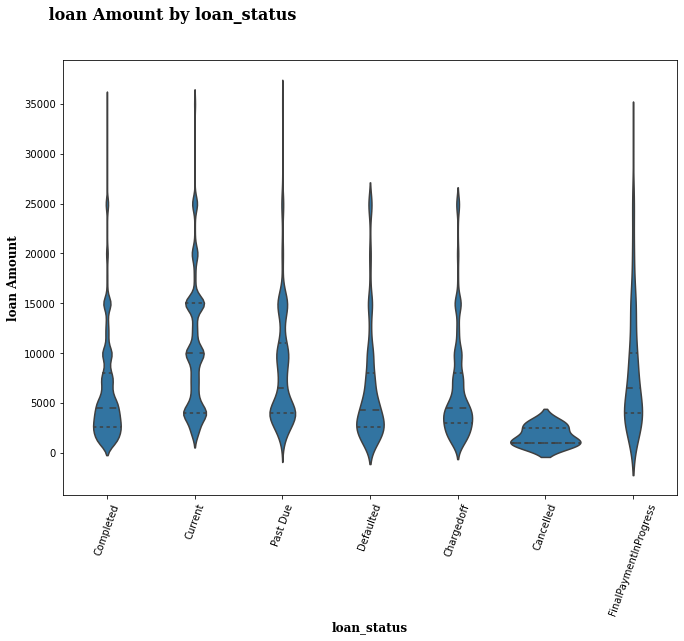

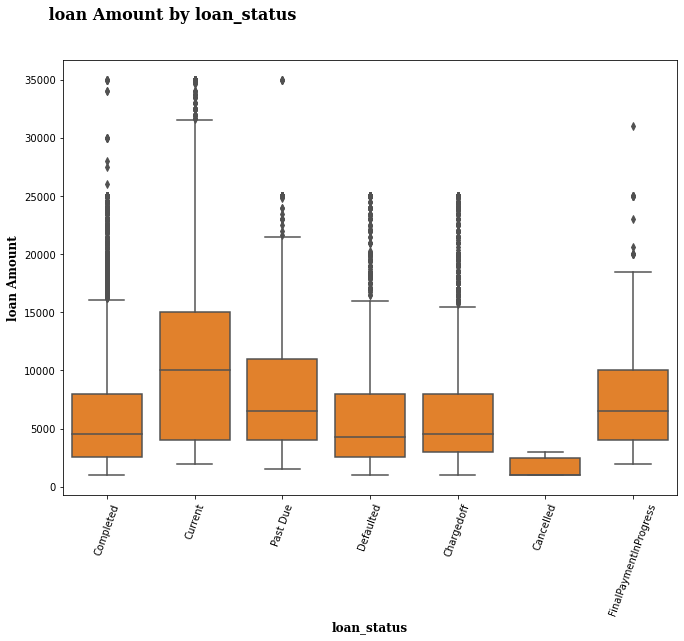

In [19]:

next(generator)

In [20]:
print(df.loan_status.value_counts(normalize = True))
df.groupby('loan_status').mean().LoanOriginalAmount

Current                   0.496555
Completed                 0.334167
Chargedoff                0.105251
Defaulted                 0.044042
Past Due                  0.018142
FinalPaymentInProgress    0.001799
Cancelled                 0.000044
Name: loan_status, dtype: float64


loan_status
Cancelled                  1700.000000
Chargedoff                 6398.916694
Completed                  6189.093239
Current                   10360.835018
Defaulted                  6486.798525
FinalPaymentInProgress     8346.121951
Past Due                   8258.437349
Name: LoanOriginalAmount, dtype: float64

### Observation;

50% of the loan are Current which are predominalty between $5,000 and $15,000 with an average of 10,360. 33% of the loan are completed with and average amount of 6189. 11% of the loan are chargedoff wit average of 6,189 range predoninatly between $3,000 and $8,000. less than 0.001 was cancelled with average of $1,700 between range of $1,500 and $3,000.


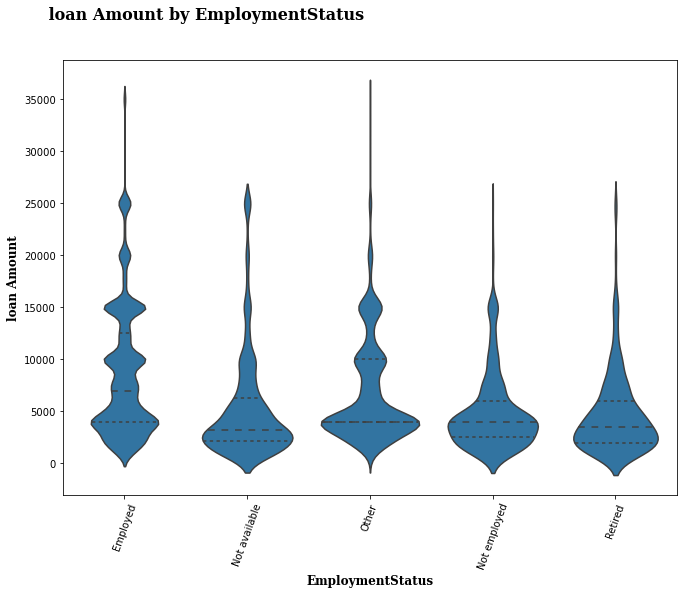

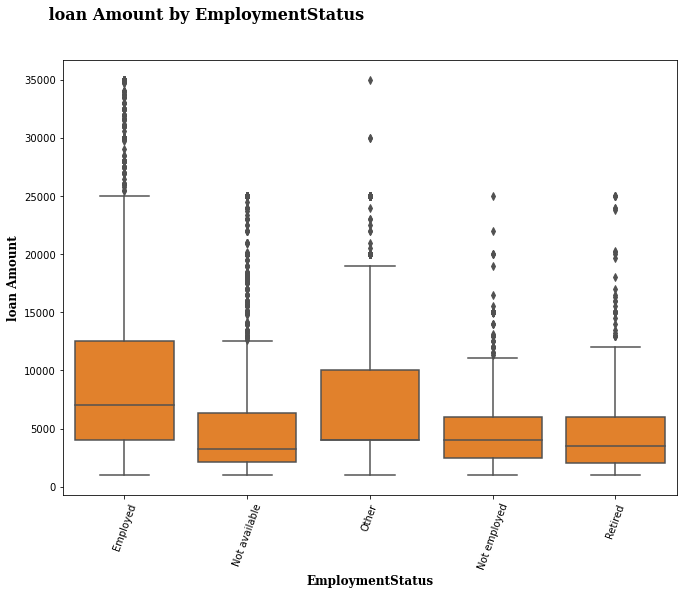

In [21]:
next(generator)

In [22]:
print(df.EmploymentStatus.value_counts(normalize = True))
df.groupby('EmploymentStatus').mean().LoanOriginalAmount

Employed         0.903449
Not available    0.047877
Other            0.034079
Not employed     0.007477
Retired          0.007118
Name: EmploymentStatus, dtype: float64


EmploymentStatus
Employed         8690.773377
Not available    5372.534879
Not employed     4872.659880
Other            6861.727010
Retired          4784.145912
Name: LoanOriginalAmount, dtype: float64

### Oberservation;

90% of borrower are employed with average 8,690 disbursed to them, the have the highest loan amount ranging between 4,000 to 13,000. 

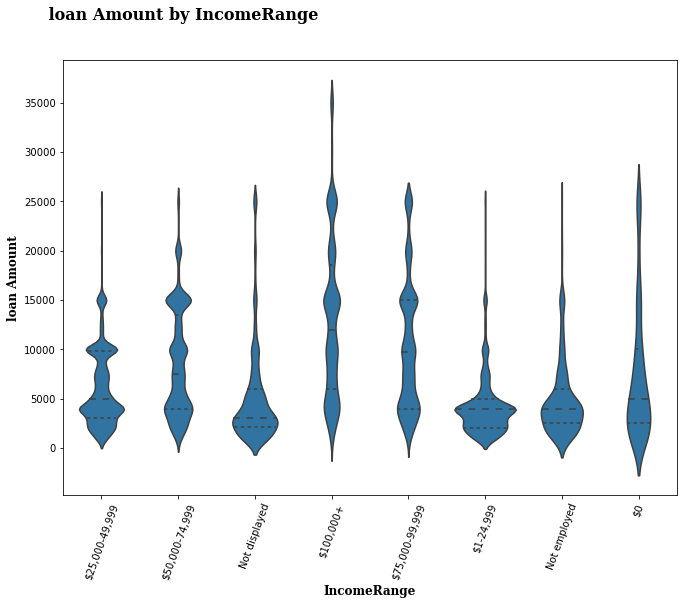

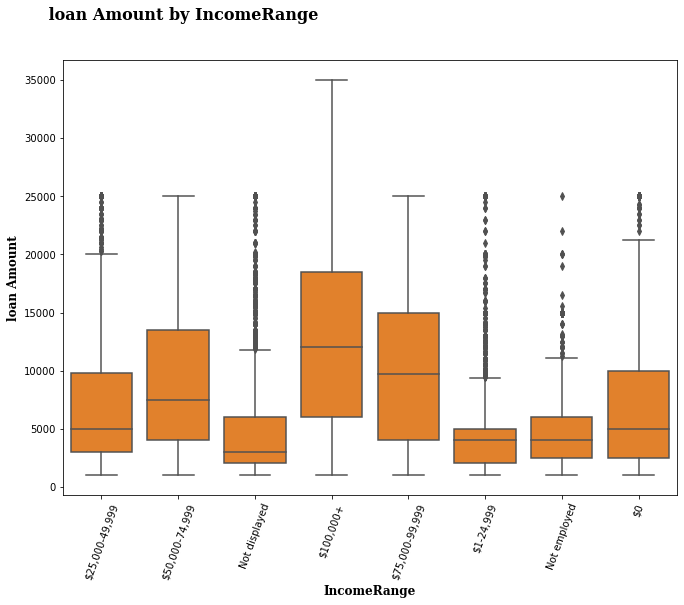

In [23]:
next(generator)

### Oberservation;
Borrower with income range of 100,000+ has the highest average loan amount of 13,073 and income range 0f zero with the lowest average loan amount of 7,410.

### What is the distribution of employment status by loan Term?

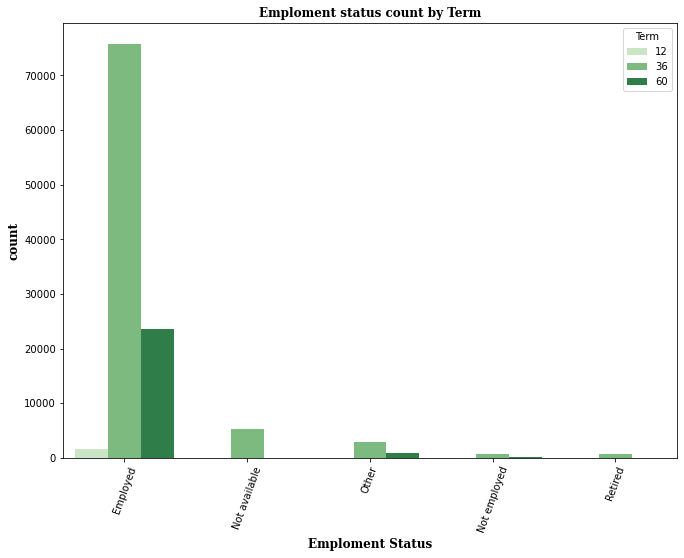

In [24]:
#checking the distribution of employemt status based  Term
fig, ax = plt.subplots(figsize =(11, 8))
sb.countplot(data = df, x = 'EmploymentStatus', hue = 'Term', palette='Greens')
plt.xticks(rotation=70)
plt.xlabel(f'Emploment Status', fontsize=12, fontweight='bold', fontfamily='serif')
plt.ylabel('count', fontsize=12, fontweight='bold', fontfamily='serif')
plt.title('Emploment status count by Term', fontsize=12, fontweight='bold', fontfamily='serif');


#### Oberservation

> Employed borrower are most likely to borrowed than other catergories, most of the employed borower are loan for 36 month term. retired bprrower borrowed for only 36 month, not employed are less to borrowe.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

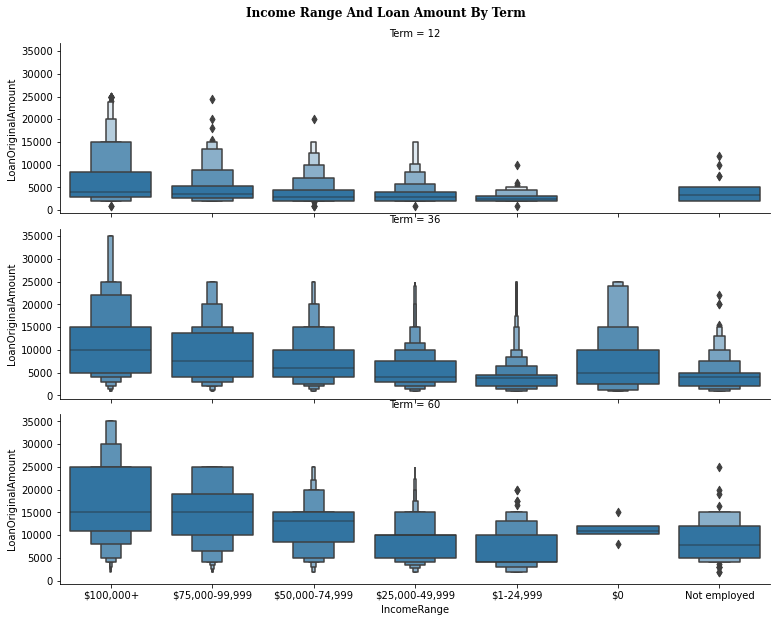

In [25]:

# faceting loan amout with employment status using Term
order = ['$100,000+','$75,000-99,999','$50,000-74,999','$25,000-49,999','$1-24,999','$0','Not employed']
f = sb.FacetGrid(data = df,col = 'Term', col_wrap = 1,  height=5, aspect=2, palette=None)
f.map(sb.boxenplot,"IncomeRange",'LoanOriginalAmount', order = order)
##labelling axis and titile
plt.suptitle('Income range and loan Amount by Term'.title(), y=1.04,fontsize=12, fontweight='bold', fontfamily='serif')
f.fig.set_size_inches(11,8);

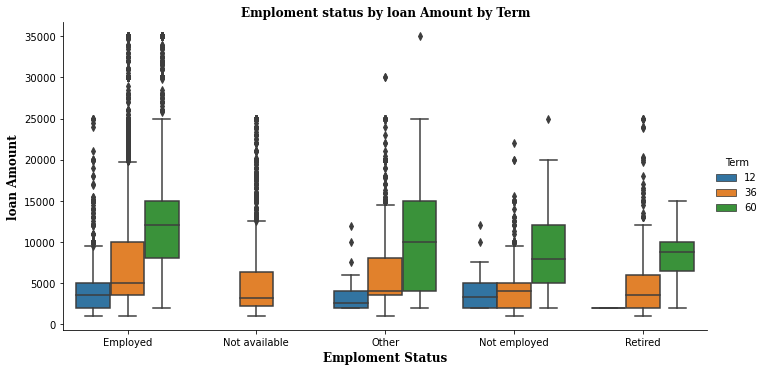

<Figure size 792x576 with 0 Axes>

In [26]:
sb.catplot(data=df, x='EmploymentStatus', y="LoanOriginalAmount", hue="Term", kind="box",height=5, aspect=2, palette=None)
plt.xlabel(f'Emploment Status', fontsize=12, fontweight='bold', fontfamily='serif')
plt.ylabel('loan Amount', fontsize=12, fontweight='bold', fontfamily='serif')
plt.title('Emploment status by loan Amount by Term', fontsize=12, fontweight='bold', fontfamily='serif')
plt.figure(figsize=[ 11,8]);


## Conclusions




> In this investigation the major features are loan amount, loan Term, borrower income range and borrower employment status. 
> In Univariate exploration most of term loan is 36 month followed by 60 Month and  then 12 month. $25,000-49,999 income range is the most common among the borrower. 90% of the borrower are employed while less than 1% are both retired and not employed others are not specified. The distribution of the loan amount decrease as the loan amount increased.

> In Bivariate Exploration, the 60 month Term has the highest loan amount distribution with mean of 15,000, follow by 36 month and then 12 month, though 36 month term possibly contain outliers that may support the findings in univariate analysis. comparing the loan amount by loan status, current loan has the highest mean loan amount amount of 15,000 while canceled loan has the lowest mean amout of about 2,000. employed Borrower has the highest loan amount as compared to retired and unemployed.
comparing the loan amount and the borrower income range, the loan amount decrease as income range decrease from 100,000 to 1, with exception as range on that more than 1, i suggest the data set might contains other information that might be responsible for the high loan amount to 0 earner.
> comparing the employment status by loan term, i discovered that 36 month term loan is most prevalent among all the employment status.

> In multivariate Exploration, for 12 month term loan, borrower with 75,000 -99,000 income range is the most prevalent as they have loan amount up to 25,000, borrower in 0 income range has no loan disbursed to them. 
Majority of 36 month loan term borrower for in to 50,000-74,999 income range, though the distribution in unimodal and its distributed normally to others range of income earner.

>Exploring Term, employment status based on the loan amount, there is increase trend in loan amount issued to the employed, not employed and others as the loan term increase for 12 mmonths to 60 month with exception in not applicable category, i suspect they are inputed based on asumption to be in 36th month as they are not avialiabe.






In [27]:
#saving df using pickle

df.to_pickle("Loan Viz file.pkl")